In [42]:
#writing some conda package or module
#!pip install netCDF4
%matplotlib inline
import warnings
from netCDF4 import Dataset
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
#!pip install cartopy
import cartopy.feature as cfeature
import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
from cartopy.util import add_cyclic_point
import os


In [43]:
#writing my file directory(path...don't copy paste instead write the path by your own)
#my_example_nc_file = '/scratch/mkibria/data/EIN75/pr/v20190502/pr_WAS-22_ECMWF-ERAINT_evaluation_r1i1p1_ICTP-RegCM4-7_v0_mon_197901-198012.nc
#fh = Dataset(my_example_nc_file) #defining my file's dataset.please notice the capital leters or small leters used in it.
#print(fh)
 

In [44]:
data = xr.open_mfdataset('/home/mkibria/Academic/pr_of_thesis/reanalysis/Eraintrim/daily/ERAIN_daily_precip*.nc')


data

<xarray.Dataset>
Dimensions:    (latitude: 241, longitude: 480, time: 13149)
Coordinates:
  * latitude   (latitude) float32 90.0 89.25 88.5 87.75 ... -88.5 -89.25 -90.0
  * longitude  (longitude) float32 0.0 0.75 1.5 2.25 ... 357.0 357.8 358.5 359.2
  * time       (time) datetime64[ns] 1979-01-02 1979-01-03 ... 2015-01-01
Data variables:
    tp         (time, latitude, longitude) float32 dask.array<chunksize=(365, 241, 480), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.0
    history:      Wed Jun 29 12:05:53 2016: ncks -O -7 -L 1 -v tp -d time,7,,...
    NCO:          20160629

In [45]:
#data.variables 

In [46]:
#for var in data.variables.values():
 #   print(var)

In [47]:
#to select the year from 1980 to 2015
data = data.sel(time=slice('1980-01-16T12:00:00.000000000','2015-12-16T00:00:00.000000000'))
data

<xarray.Dataset>
Dimensions:    (latitude: 241, longitude: 480, time: 12769)
Coordinates:
  * latitude   (latitude) float32 90.0 89.25 88.5 87.75 ... -88.5 -89.25 -90.0
  * longitude  (longitude) float32 0.0 0.75 1.5 2.25 ... 357.0 357.8 358.5 359.2
  * time       (time) datetime64[ns] 1980-01-17 1980-01-18 ... 2015-01-01
Data variables:
    tp         (time, latitude, longitude) float32 dask.array<chunksize=(351, 241, 480), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.0
    history:      Wed Jun 29 12:05:53 2016: ncks -O -7 -L 1 -v tp -d time,7,,...
    NCO:          20160629

In [48]:
#selecting only JJAS months

def is_jjas(month):
    return (month >= 6) & (month <= 9)

jjas_data = data.sel(time=is_jjas(data['time.month']))

jjas_data

<xarray.Dataset>
Dimensions:    (latitude: 241, longitude: 480, time: 4270)
Coordinates:
  * latitude   (latitude) float32 90.0 89.25 88.5 87.75 ... -88.5 -89.25 -90.0
  * longitude  (longitude) float32 0.0 0.75 1.5 2.25 ... 357.0 357.8 358.5 359.2
  * time       (time) datetime64[ns] 1980-06-01 1980-06-02 ... 2014-09-30
Data variables:
    tp         (time, latitude, longitude) float32 dask.array<chunksize=(122, 241, 480), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.0
    history:      Wed Jun 29 12:05:53 2016: ncks -O -7 -L 1 -v tp -d time,7,,...
    NCO:          20160629

In [49]:
#jjas_data = jjas_data.sel(longitude = slice(86.,94.), latitude = slice(18,27))
#jjas_data

In [50]:
#data["pr"]["x"][379:429].values
#data["pr"]["y"][237:337].values
#data["pr"]["time"].values
#jjas_data["pr"]["lat"][:].values

#jjas_data["pr"]["lon"][:].values


#data["pr"]["x"].values

#data.x

In [51]:
#data["pr"]["y"][287:337].values

In [52]:
#to select the x and y coordinates
#jjas_data = jjas_data.sel(x=slice(4125000.,5350000.),y=slice(2975000.,4200000.))
#jjas_data

In [53]:
#getting the mean for JJAS data
jjas_mean = jjas_data.tp.mean('time')
 
jjas_mean 

<xarray.DataArray 'tp' (latitude: 241, longitude: 480)>
dask.array<mean_agg-aggregate, shape=(241, 480), dtype=float32, chunksize=(241, 480), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float32 90.0 89.25 88.5 87.75 ... -88.5 -89.25 -90.0
  * longitude  (longitude) float32 0.0 0.75 1.5 2.25 ... 357.0 357.8 358.5 359.2

The pr is given in kg m $^{-2}$  s $^{-1}$ so we have to convert it into mm/day.

The formula is 1 kgm$^{-2}$ s$^{-1}$  = 86400 mm/day. 

so we have to divide pr value by 86400

 

In [54]:
pr_mm = jjas_mean*1000
pr_mm

<xarray.DataArray 'tp' (latitude: 241, longitude: 480)>
dask.array<mul, shape=(241, 480), dtype=float32, chunksize=(241, 480), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float32 90.0 89.25 88.5 87.75 ... -88.5 -89.25 -90.0
  * longitude  (longitude) float32 0.0 0.75 1.5 2.25 ... 357.0 357.8 358.5 359.2

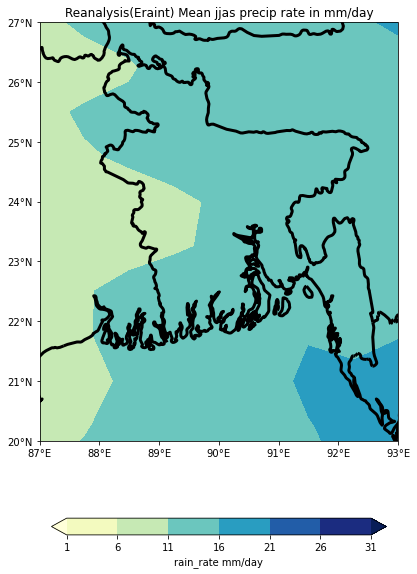

In [55]:
#plotting with cartopy jjas_pr_mean
import cartopy.feature as cfeature




fig = plt.figure(figsize=(12,9.5))

ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([88,93,20,27])


 
m1 = ax.contourf(pr_mm['longitude'][:], pr_mm['latitude'][:],pr_mm,
                 levels=np.arange(1,35+1,5),transform = ccrs.PlateCarree(),cmap='YlGnBu',extend='both')




# Define the xticks for longitude
ax.set_xticks(np.arange(87,94,1), crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

# Define the yticks for latitude
ax.set_yticks(np.arange(20,28,1), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)




plt.colorbar(m1, orientation = 'horizontal',shrink=0.5, fraction = 0.04 , label = 'rain_rate mm/day')
ax.coastlines(linewidth=3)
ax.add_feature(cfeature.BORDERS,linewidth=3)
#ax.add_feature(cfeature.STATES)
#ax.add_feature(cfeature.LAND)
#ax.add_feature(cfeature.LAKES)
#ax.add_feature(cfeature.OCEAN)
#ax.add_feature(cfeature.RIVERS)



plt.title('Reanalysis(Eraint) Mean jjas precip rate in mm/day')
plt.savefig("/home/mkibria/Academic/pr_of_thesis/figures/bd_daily_pr_re_eraintrin_jjas_mean.png")







Now I will plot the annual precipitation rate in mm/day

In [56]:
annual_mean = data.tp.mean('time')
annual_mean

<xarray.DataArray 'tp' (latitude: 241, longitude: 480)>
dask.array<mean_agg-aggregate, shape=(241, 480), dtype=float32, chunksize=(241, 480), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float32 90.0 89.25 88.5 87.75 ... -88.5 -89.25 -90.0
  * longitude  (longitude) float32 0.0 0.75 1.5 2.25 ... 357.0 357.8 358.5 359.2

In [57]:
#converting from kgm-2s-2 to mm/day

annual_pr_mm = annual_mean*1000
annual_pr_mm

<xarray.DataArray 'tp' (latitude: 241, longitude: 480)>
dask.array<mul, shape=(241, 480), dtype=float32, chunksize=(241, 480), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float32 90.0 89.25 88.5 87.75 ... -88.5 -89.25 -90.0
  * longitude  (longitude) float32 0.0 0.75 1.5 2.25 ... 357.0 357.8 358.5 359.2

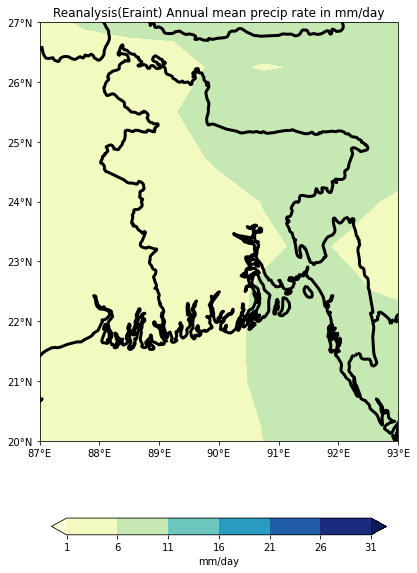

In [58]:
# Plotting annual_pr_mean

#plotting with cartopy
import cartopy.feature as cfeature


fig = plt.figure(figsize=(12,9.5))

ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([88,93,20,27])


m1 = ax.contourf(annual_pr_mm['longitude'], annual_pr_mm['latitude'],annual_pr_mm,
                 np.arange(1,35+1,5),transform = ccrs.PlateCarree(),cmap='YlGnBu',extend='both')

 
# Define the xticks for longitude
ax.set_xticks(np.arange(87,94,1), crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

# Define the yticks for latitude
ax.set_yticks(np.arange(20,28,1), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)


plt.colorbar(m1, orientation = 'horizontal',shrink=0.5, fraction = 0.04 , label = 'mm/day')
ax.coastlines(linewidth=3)
ax.add_feature(cfeature.BORDERS,linewidth=3)
#ax.add_feature(cfeature.STATES)
plt.title('Reanalysis(Eraint) Annual mean precip rate in mm/day')





#to save and overwrite
strFile ="/home/mkibria/Academic/pr_of_thesis/figures/bd_daily_pr_re_eraintrin_annual_mean.png"

if os.path.isfile(strFile):
   os.remove(strFile)   # Opt.: os.system("rm "+strFile)
plt.savefig(strFile)





